In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import TomekLinks

# Data exploration


In [99]:
df = pd.read_csv("data/test.txt", sep=";", decimal=',')


In [148]:
print("Shape: ", df.shape, "\n")
print("Data Types: ")
df['MontAnt'] = pd.to_numeric(df['MontAnt'], downcast='float')
df['DAteTrAnsAction'] = pd.to_datetime(df['DAteTrAnsAction'])
df.drop(['ZIBZIN', 'IDAvisAutorisAtionCheque'], axis=1, inplace=True)
print(df.dtypes)


Shape:  (264143, 23) 

Data Types: 
MontAnt                   float32
DAteTrAnsAction    datetime64[ns]
CodeDecision                int64
VerifiAnceCPT1              int64
VerifiAnceCPT2              int64
VerifiAnceCPT3              int64
D2CB                        int64
ScoringFP1                float64
ScoringFP2                float64
ScoringFP3                float64
TAuxImpNb_RB              float64
TAuxImpNB_CPM             float64
EcArtNumCheq                int64
NbrMAgAsin3J                int64
DiffDAteTr1               float64
DiffDAteTr2               float64
DiffDAteTr3               float64
CA3TRetMtt                float64
CA3TR                     float64
Heure                       int64
FlAgImpAye                  int64
dtype: object


In [149]:
df.describe()


,MontAnt,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TAuxImpNb_RB,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
count,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,2.641430e+05,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000
mean,58.745243,0.014473,0.392579,0.418868,0.464972,234.201769,3.076643,0.564414,0.185300,32.922489,32.717720,5.758895e+03,1.032562,3.973935,4.243183,4.273391,64.920136,6.174899,53541.022670,0.003237
std,84.104126,0.175802,0.519606,0.588430,0.712331,208.760007,30.026408,9.353397,0.574982,95.844590,34.639825,1.583986e+05,0.183899,1.059278,0.549602,0.468173,95.891564,37.963702,11729.169206,0.056802
min,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-47.552842,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000116,0.000475,0.002025,0.020000,0.000000,26669.000000,0.000000
25%,24.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.007220,-3.012904,0.001443,0.000000,13.908206,0.000000e+00,1.000000,4.000000,4.000000,4.000000,27.400000,0.000000,42647.000000,0.000000
50%,41.910000,0.000000,0.000000,0.000000,0.000000,212.000000,0.018376,0.000000,0.002552,15.479876,25.265285,0.000000e+00,1.000000,4.000000,4.000000,4.000000,46.500000,0.000000,55059.000000,0.000000
75%,70.255001,0.000000,1.000000,1.000000,1.000000,448.000000,0.169776,5.111410,0.020151,34.602076,39.274924,0.000000e+00,1.000000,5.000000,5.000000,5.000000,78.630000,0.000000,63779.000000,0.000000
max,15300.000000,3.000000,10.000000,17.000000,36.000000,551.000000,4950.000000,46.891244,16.516975,10000.000000,714.285714,9.948073e+06,10.000000,5.000000,5.000000,5.000000,15589.000000,10600.000000,79676.000000,1.000000


In [150]:
df.head()


,MontAnt,DAteTrAnsAction,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,...,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
45600,170.520004,2016-09-24 14:33:57,0,1,1,1,456,0.010684,-21.260506,0.001829,...,13.642565,0,1,4.0,4.0,4.0,170.52,0.0,52437,0
146667,20.330000,2016-10-04 19:22:48,0,0,0,0,1,4.066000,-1.654253,0.817235,...,9.451796,0,1,5.0,5.0,5.0,20.33,0.0,69768,0
175224,80.949997,2016-10-07 20:03:32,0,1,1,1,317,0.019643,4.275676,0.002376,...,39.274924,0,1,4.0,4.0,4.0,80.95,0.0,72212,0
164569,231.869995,2016-10-06 19:11:23,0,1,1,1,513,0.011024,-19.715212,0.001512,...,24.813896,0,1,4.0,4.0,4.0,231.87,0.0,69083,0
46556,37.000000,2016-09-24 15:22:53,0,0,0,0,338,0.054734,0.068039,0.002220,...,99.009901,0,1,4.0,4.0,4.0,37.00,0.0,55373,0


In [151]:
# there is not null data in our dataset columns
df.isnull().sum()


MontAnt            0
DAteTrAnsAction    0
CodeDecision       0
VerifiAnceCPT1     0
VerifiAnceCPT2     0
VerifiAnceCPT3     0
D2CB               0
ScoringFP1         0
ScoringFP2         0
ScoringFP3         0
TAuxImpNb_RB       0
TAuxImpNB_CPM      0
EcArtNumCheq       0
NbrMAgAsin3J       0
DiffDAteTr1        0
DiffDAteTr2        0
DiffDAteTr3        0
CA3TRetMtt         0
CA3TR              0
Heure              0
FlAgImpAye         0
dtype: int64

In [152]:
rows = len(df)
fraud_flag = df['FlAgImpAye'].value_counts()
print(f'Not Frauds { fraud_flag[0] } \t represents { round((fraud_flag[0] / rows) * 100, 3) } %')
print(f'Frauds { fraud_flag[1] } \t\t represents { round((fraud_flag[1] / rows) * 100, 3) } %')


Not Frauds 263288 	 represents 99.676 %
Frauds 855 		 represents 0.324 %


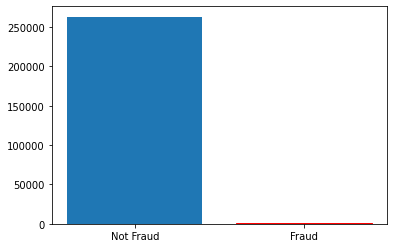

In [153]:
barchart_frauds = plt.bar(['Not Fraud', 'Fraud'], [fraud_flag[0], fraud_flag[1]])
barchart_frauds[1].set_color('r')



# Explore distributions


In [154]:
# extract in different dicts the fraudulent and non fraudulent samples
df_frauds = df.loc[df['FlAgImpAye'] == 1]
df_non_frauds = df.loc[df['FlAgImpAye'] == 0]


Distribution of 'Code Decision' for fraud and non fraud transactions


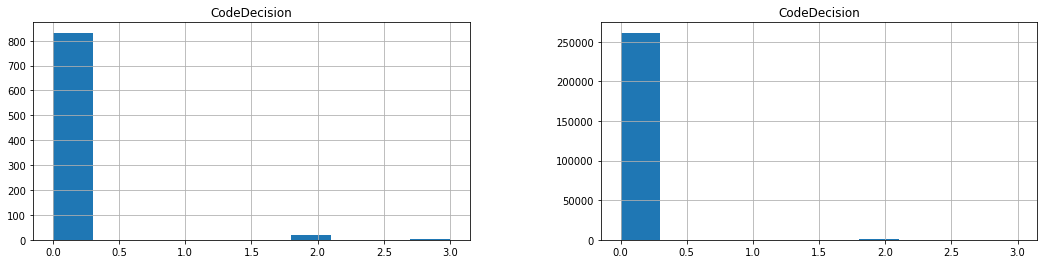

In [155]:
fig, axs = plt.subplots(1, 2, figsize=(18,4))
print("Distribution of 'Code Decision' for fraud and non fraud transactions")
df_frauds.hist(column="CodeDecision", ax=axs[0])
df_non_frauds.hist(column="CodeDecision", ax=axs[1])
plt.show()


Distribution of 'Nombre Magasins 3 Jours' for fraud and non fraud transactions


array([<AxesSubplot:title={'center':'NbrMAgAsin3J'}>], dtype=object)

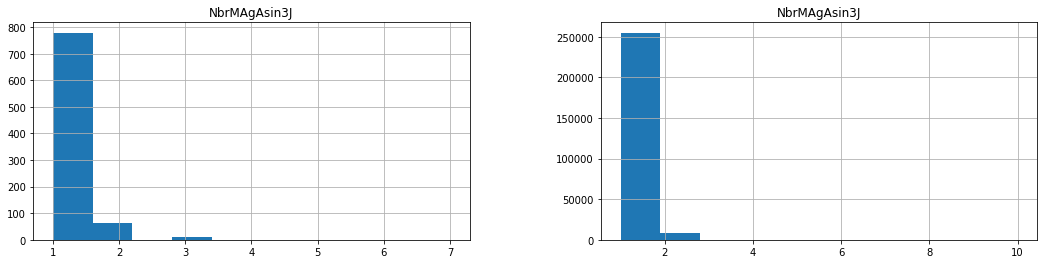

In [156]:
fig, axs = plt.subplots(1, 2, figsize=(18,4))
print("Distribution of 'Nombre Magasins 3 Jours' for fraud and non fraud transactions")
df_frauds.hist(column="NbrMAgAsin3J", ax=axs[0])
df_non_frauds.hist(column="NbrMAgAsin3J", ax=axs[1])


Distribution of 'Nombre de transactions' by day (Just frauds)


<AxesSubplot:xlabel='DAteTrAnsAction'>

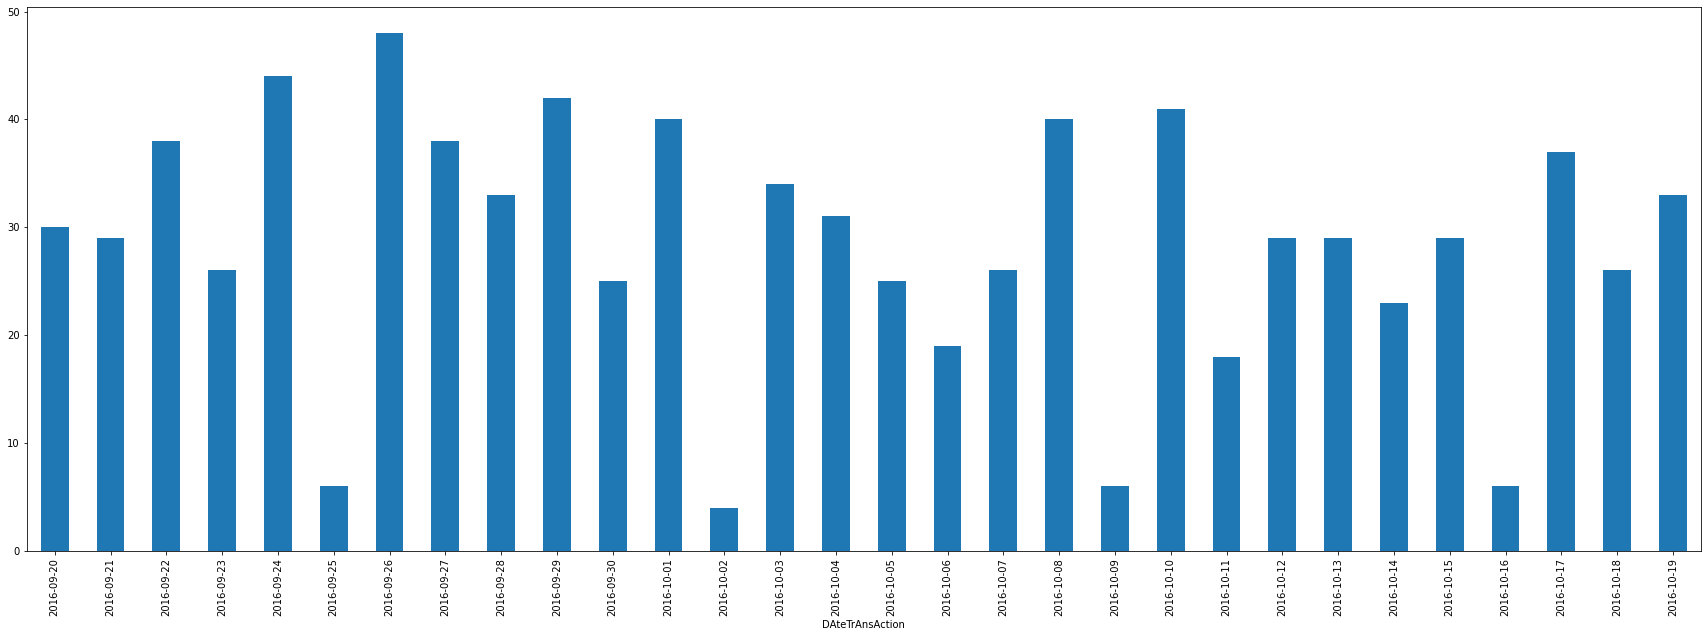

In [158]:
plt.figure(figsize=(30,10))
print("Distribution of 'Nombre de transactions' by day (Just frauds)")
df_frauds['MontAnt'].groupby([df['DAteTrAnsAction'].dt.to_period('D')]).count().plot(kind='bar')


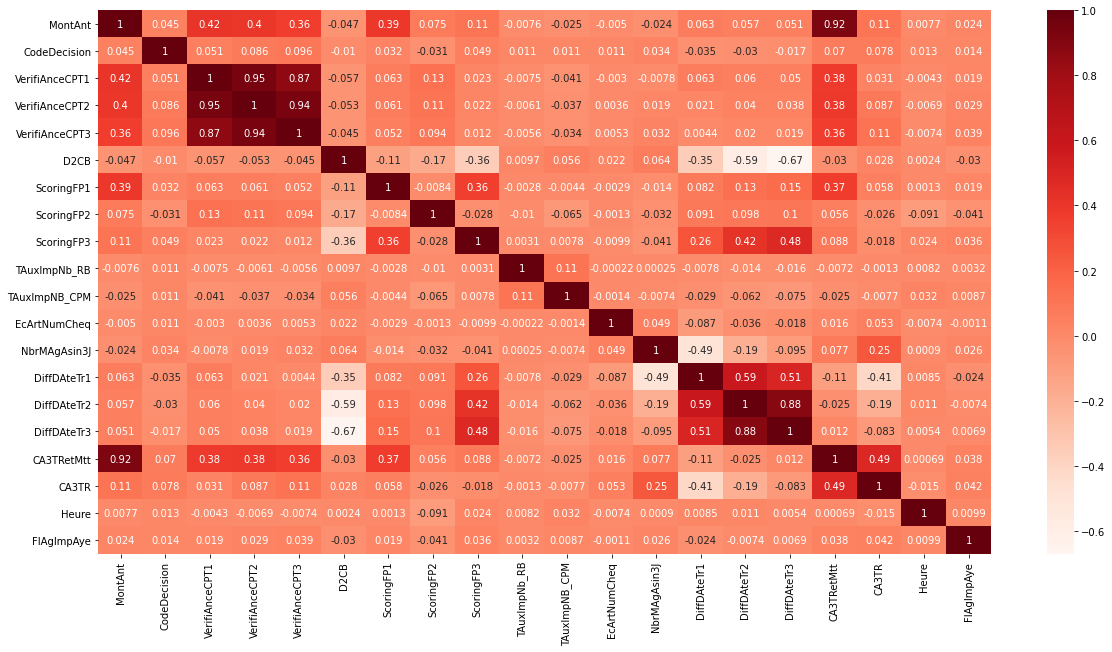

In [163]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df.corr(), annot=True, cbar=True, cmap=plt.cm.Reds)

In [160]:
df.corrwith(df['FlAgImpAye'])


MontAnt           0.024122
CodeDecision      0.013506
VerifiAnceCPT1    0.018515
VerifiAnceCPT2    0.028755
VerifiAnceCPT3    0.038872
D2CB             -0.030417
ScoringFP1        0.018850
ScoringFP2       -0.041055
ScoringFP3        0.035505
TAuxImpNb_RB      0.003190
TAuxImpNB_CPM     0.008715
EcArtNumCheq     -0.001096
NbrMAgAsin3J      0.026153
DiffDAteTr1      -0.024448
DiffDAteTr2      -0.007350
DiffDAteTr3       0.006884
CA3TRetMtt        0.037748
CA3TR             0.041908
Heure             0.009945
FlAgImpAye        1.000000
dtype: float64

# Under-sampling

In [142]:
df = df.sample(frac=1)
df_frauds = df.loc[df['FlAgImpAye'] == 1]
df_non_frauds = df.loc[df['FlAgImpAye'] == 0][:855]
balanced_df = pd.concat([df_frauds, df_non_frauds])
balanced_df = balanced_df.sample(frac=1, random_state=42)
balanced_df.head()


,ZIBZIN,IDAvisAutorisAtionCheque,MontAnt,DAteTrAnsAction,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,...,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
118984,A020002006908051147874010,75813341,38.849998,2016-10-01 16:08:17,0,0,0,0,1,0.045386,...,4.723666,0,1,5.0,5.0,5.0,38.85,0.0,58097,0
108761,A075003825908004739505781,75787687,267.260010,2016-09-30 18:50:42,0,1,1,1,1,5.139615,...,41.356493,0,1,5.0,5.0,5.0,267.26,0.0,67842,0
94877,A075000041908008698320020,75752379,19.650000,2016-09-29 17:10:44,0,0,0,0,1,6.550000,...,25.265285,0,1,5.0,5.0,5.0,19.65,0.0,61844,0
25105,A031010002908404724502304,75588048,120.339996,2016-09-22 18:02:28,0,1,1,2,329,0.009886,...,9.451796,0,1,4.0,4.0,4.0,120.34,0.0,64948,1
164884,A033010041908020364221922,75919615,69.570000,2016-10-06 19:43:54,0,0,0,0,246,0.012296,...,48.959608,0,1,4.0,4.0,4.0,69.57,0.0,71034,0


"FlAgImpAye" subsample distribution
1    0.5
0    0.5
Name: FlAgImpAye, dtype: float64


c:\users\juan pablo\desktop\fouille de données\fraud-detection\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


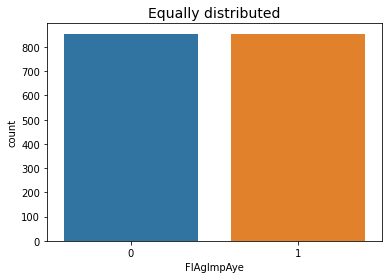

In [146]:
print('"FlAgImpAye" subsample distribution')
print(balanced_df['FlAgImpAye'].value_counts()/len(balanced_df))
sns.countplot('FlAgImpAye', data=balanced_df)
plt.title('Equally distributed', fontsize=14)
plt.show()


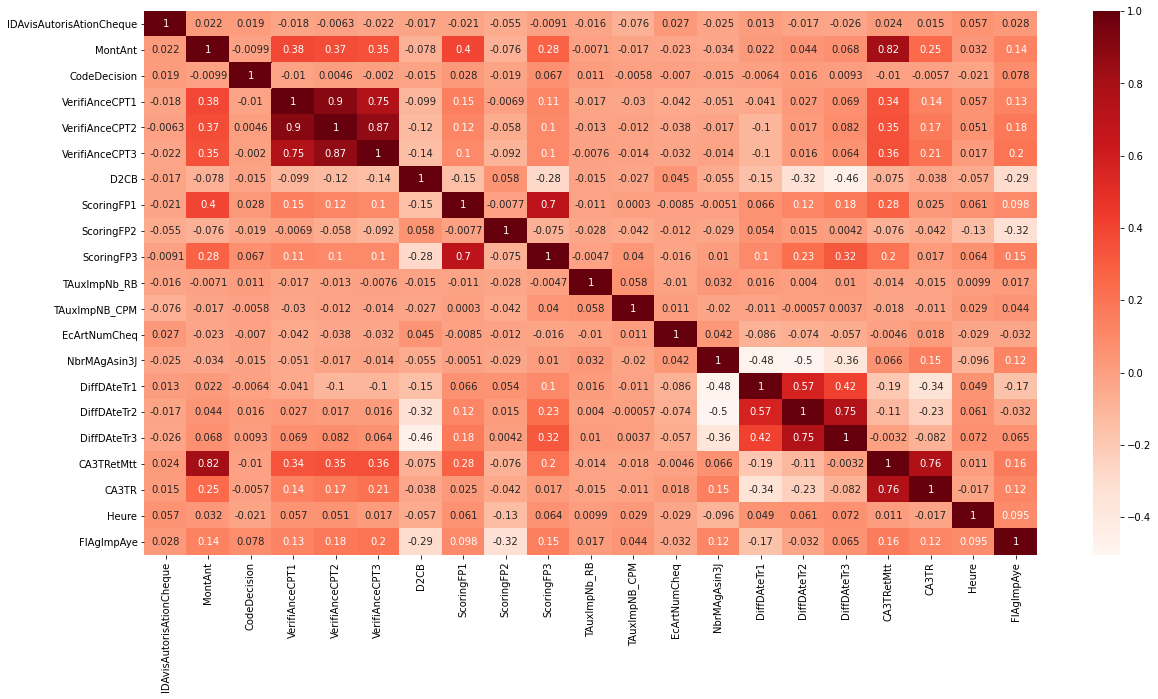

In [147]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(balanced_df.corr(), annot=True, cbar=True, cmap=plt.cm.Reds)

